In [70]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [71]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 35

In [72]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantData/Apple",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7771 files belonging to 4 classes.


In [73]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [74]:
len(class_names)

4

# VIsualiztion

(32, 256, 256, 3)
[0 0 2 3 2 0 0 1 3 0 3 0 3 0 2 1 0 3 2 3 1 0 2 3 0 2 3 0 3 2 2 2]


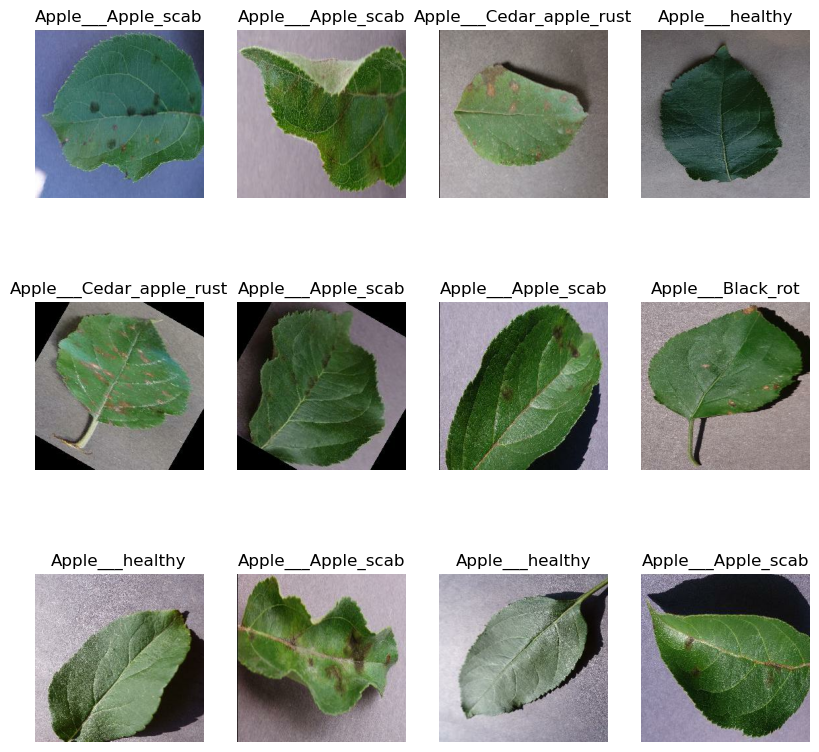

In [75]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[labels_batch[i]])

        plt.axis("off")

# training and testing

80 = training
10 = validation
10 = test

In [76]:
train_size = 0.8
len(dataset)*train_size

194.4

In [77]:
train_ds = dataset.take(54)
len(train_ds)

54

In [78]:
test_ds = dataset.skip(54)
len(test_ds)

189

In [79]:
val_size = 0.1
len(dataset)*val_size

24.3

In [80]:
test_ds = test_ds.skip(6)
len(test_ds)

183

In [81]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [82]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [83]:
len(train_ds)

194

In [84]:
len(val_ds)

24

In [85]:
len(test_ds)

25

In [86]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [87]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.01176471 0.         0.04313726]
  [0.01176471 0.         0.04313726]
  [0.01176471 0.         0.04313726]
  ...
  [0.         0.         0.07450981]
  [0.         0.         0.07843138]
  [0.         0.         0.08235294]]

 [[0.6627451  0.6392157  0.69411767]
  [0.6784314  0.654902   0.70980394]
  [0.68235296 0.65882355 0.7137255 ]
  ...
  [0.56078434 0.5647059  0.64705884]
  [0.5647059  0.5686275  0.6509804 ]
  [0.5686275  0.57254905 0.654902  ]]

 [[0.67058825 0.64705884 0.7019608 ]
  [0.68235296 0.65882355 0.7137255 ]
  [0.6862745  0.6627451  0.7176471 ]
  ...
  [0.5647059  0.5647059  0.65882355]
  [0.5686275  0.5686275  0.6627451 ]
  [0.5686275  0.5686275  0.6627451 ]]

 ...

 [[0.6        0.5568628  0.61960787]
  [0.7411765  0.69803923 0.7607843 ]
  [0.9019608  0.85882354 0.92156863]
  ...
  [0.6745098  0.6509804  0.7529412 ]
  [0.4745098  0.4509804  0.5529412 ]
  [0.31764707 0.29411766 0.39607844]]

 [[0.6509804  0.60784316 0.67058825]
  [0.6156863  0.57254905 0.63529414]


In [88]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [89]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [90]:
IMAGE_SIZE

256

In [91]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [92]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_11 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [93]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [94]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/35
194/194 [==============================] - 577s 3s/step - loss: 0.8520 - accuracy: 0.6291 - val_loss: 1.0110 - val_accuracy: 0.5638
Epoch 2/35
194/194 [==============================] - 536s 3s/step - loss: 0.5187 - accuracy: 0.7999 - val_loss: 1.3693 - val_accuracy: 0.7292
Epoch 3/35
194/194 [==============================] - 458s 2s/step - loss: 0.3734 - accuracy: 0.8614 - val_loss: 0.4567 - val_accuracy: 0.8294
Epoch 4/35
194/194 [==============================] - 454s 2s/step - loss: 0.2619 - accuracy: 0.8960 - val_loss: 0.6220 - val_accuracy: 0.8177
Epoch 5/35
194/194 [==============================] - 449s 2s/step - loss: 0.1925 - accuracy: 0.9281 - val_loss: 0.5068 - val_accuracy: 0.8451
Epoch 6/35
194/194 [==============================] - 447s 2s/step - loss: 0.1583 - accuracy: 0.9412 - val_loss: 0.1541 - val_accuracy: 0.9453
Epoch 7/35
194/194 [==============================] - 437s 2s/step - loss: 0.1264 - accuracy: 0.9520 - val_loss: 0.1789 - val_accuracy: 0.9440

In [95]:
len(test_ds)

25

In [96]:
scores = model.evaluate(test_ds)

25/25 [==============================] - 69s 646ms/step - loss: 0.0060 - accuracy: 0.9987


In [97]:
scores

[0.005990440957248211, 0.9987421631813049]

### Plotting the Accuracy and Loss Curves

In [98]:
history

In [99]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 194}

In [100]:
history.history.keys()    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [101]:
len(history.history['loss'])

35

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [103]:
history.history['accuracy']

[0.6290504336357117,
 0.799935519695282,
 0.8613573908805847,
 0.8960180282592773,
 0.9280993342399597,
 0.9411575198173523,
 0.9519587159156799,
 0.9606642127037048,
 0.9617927074432373,
 0.9605029821395874,
 0.9743672609329224,
 0.97678542137146,
 0.97871994972229,
 0.9808157086372375,
 0.9822666645050049,
 0.9864581823348999,
 0.9871029853820801,
 0.98355633020401,
 0.9875866770744324,
 0.9888763427734375,
 0.9846848249435425,
 0.9796872735023499,
 0.9948412179946899,
 0.9848460555076599,
 0.9888763427734375,
 0.9950023889541626,
 0.9880703091621399,
 0.98194420337677,
 0.9954860806465149,
 0.9948412179946899,
 0.9912945628166199,
 0.99516361951828,
 0.9929066300392151,
 0.9890375733375549,
 0.9943575859069824]

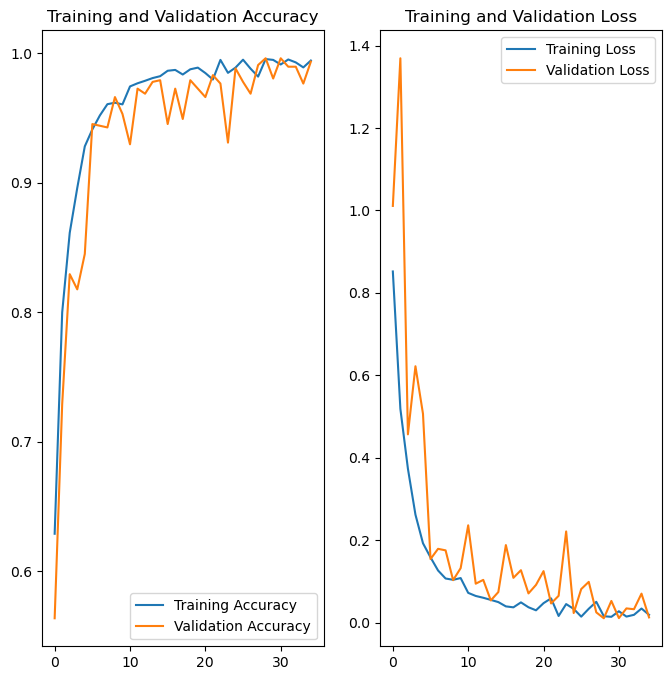

In [104]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on image

first image to predict
actual label: Apple___Apple_scab
predicted label: Apple___Apple_scab


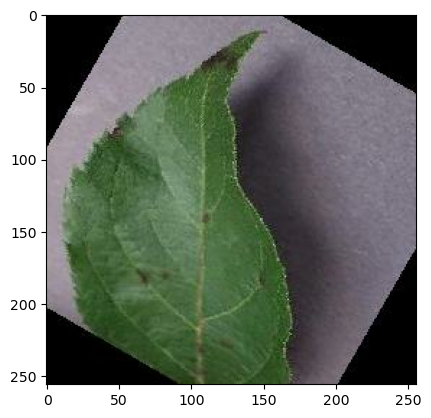

In [105]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Function for interference

In [106]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


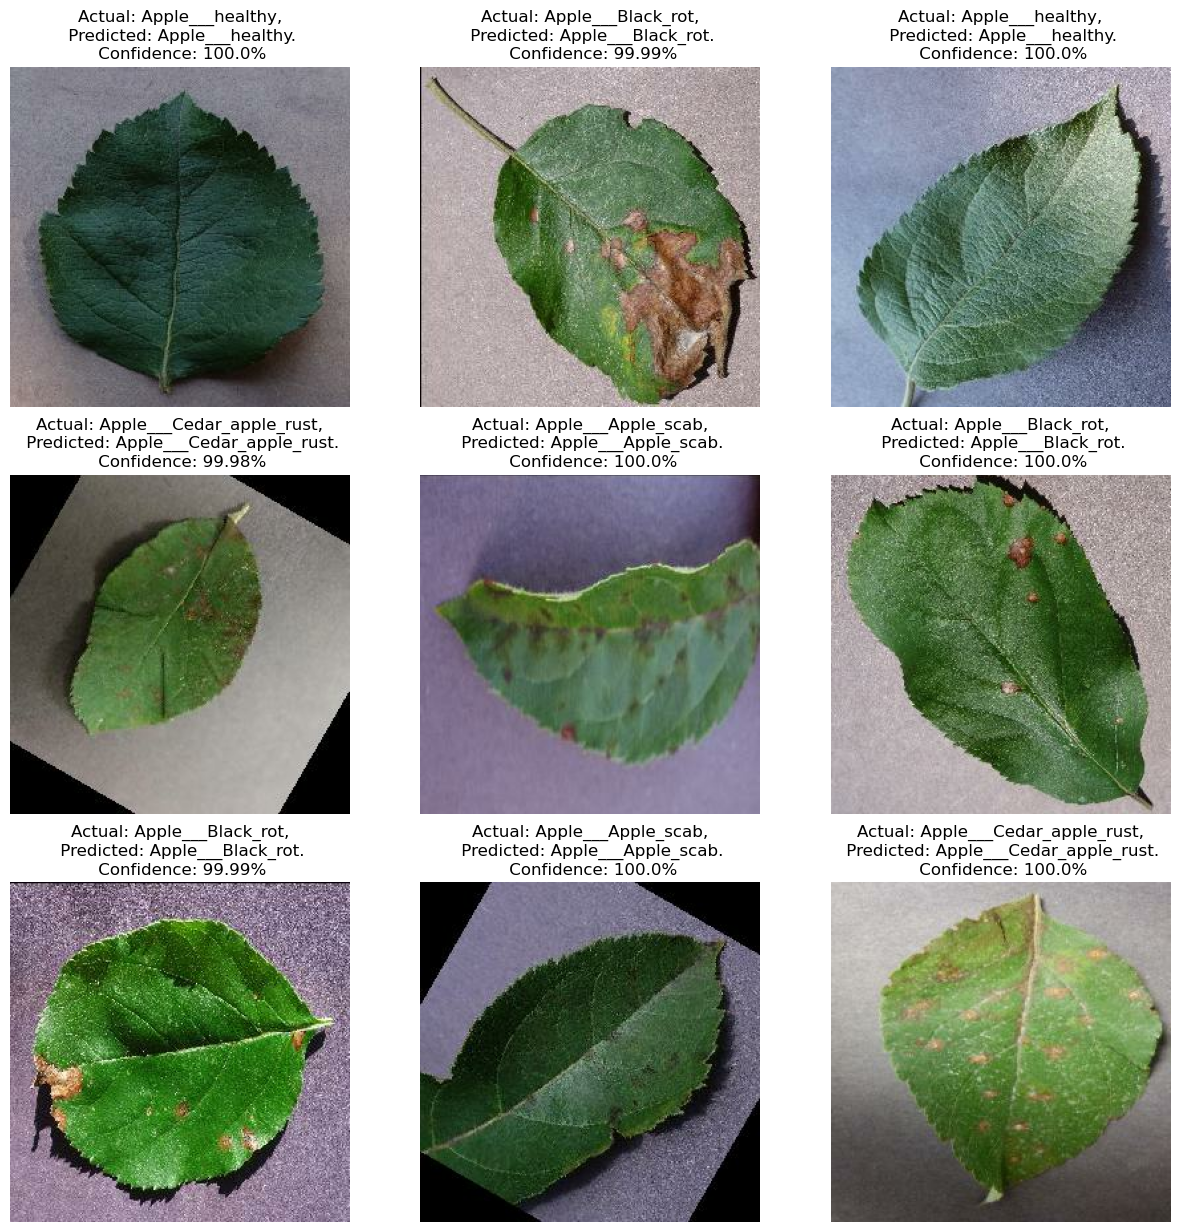

In [107]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


### Saving the Model
We append the model to the list of models as a new version

In [109]:
import os
model_version = max([int(i) for i in os.listdir("C:/Potato Project/training/models/Apple_models") + [0]])+1
model.save(f"C:/Potato Project/training/models/Apple_models/{model_version}")


INFO:tensorflow:Assets written to: C:/Potato Project/training/models/Apple_models/1\assets


In [110]:
model.save("../Apple.h5")
